# Census Income Project
Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 
# The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [3]:
# import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

#import required accuracy metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importing our DataSet
data=pd.read_csv("census_income.csv")

In [5]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# EDA 

# Shape of our data

In [6]:
data.shape

(32560, 15)

So our data contains a total of 32560 rows and 14 features and one label

In [7]:
# check the informations about our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Only six numberic data type annd 9 object type data type, also as per this info all features does not have any null values

In [8]:
# We can check null values using isnull u=function also
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

This also shows that there is no null values present in our data

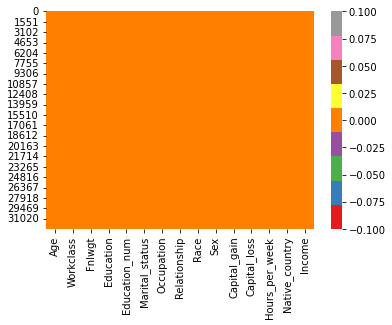

In [9]:
# Let's visualize the null values clearly
sns.heatmap(data.isnull(),cmap="Set1")
plt.show()

In [10]:
#let us check and delete any duplicate data is present
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(32536, 15)

    A total of 24 duplicate data were deleeted using drop_duplicate function

In [12]:
# Checking number of unique values in each column
data.nunique().to_frame("No of unique values")

,No of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [13]:
# Lte us check the values counts of different features

In [14]:
data['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

We have a problem here '?' present in our data so we have to replace that let us check all other features also if any missing data is present

In [15]:
for i in data.columns:
        print(i,"\n",data[i].value_counts())
        print('******************************')

Age 
 36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
******************************
Workclass 
  Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
******************************
Fnlwgt 
 123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
******************************
Education 
  HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th      

So occupation class and Native_country and Workclass have this '?' so we will remove this by mode of that features

Also we noticed that value of capital Gain is '0. for about 90% of data so we will remove the same alos from our data

In [16]:
data.drop("Capital_gain",axis=1,inplace=True)

In [17]:
#We will replace all '?' with most frequently occuring values of that column because these are categorical columns
data['Workclass'] = data.Workclass.str.replace('?', 'Private')
data['Occupation'] = data.Occupation.str.replace('?', 'Prof-specialty')
data['Native_country'] = data.Native_country.str.replace('?', 'United-States')

In [18]:
#Most of the columns have unique type of values, let's replace them with the new values.

data.Workclass=data.Workclass.replace([' Local-gov',' State-gov',' Federal-gov'],' Govt-Sector')
data.Workclass=data.Workclass.replace([' Private',' Self-emp-not-inc',' Self-emp-inc'],' Pvt-sector')
data.Workclass=data.Workclass.replace([' Without-pay',' Never-worked'],'Not-working')

In [19]:
data['Workclass'].value_counts()

 Pvt-sector     28165
 Govt-Sector     4350
Not-working        21
Name: Workclass, dtype: int64

Now we reduced or data to 3 values

In [20]:
# we can rename some features in Education field also
data["Education"]=data["Education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'School')
data["Education"]=data["Education"].replace([' HS-grad',' Prof-school'],' High-School')
data["Education"]=data["Education"].replace([' Some-college',' Assoc-voc',' Assoc-acdm'],' Secondary-School')

In [22]:
data['Education'].value_counts()

 High-School         11070
 Secondary-School     9731
 Bachelors            5352
School                4248
 Masters              1722
 Doctorate             413
Name: Education, dtype: int64

In [24]:
# Similarly we can change the valuse of Material Status also
data["Marital_status"]=data["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse'],' Married')
data["Marital_status"]=data["Marital_status"].replace([' Never-married'],' Single')
data["Marital_status"]=data["Marital_status"].replace([' Divorced',' Widowed',' Separated',' Married-spouse-absent',],' Others')

In [25]:
# Statistical summary of dataset
data.describe()

,Age,Fnlwgt,Education_num,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,4356.000000,99.000000


# EDA Concluding Remarks:-
We have 6 columns of type numeric and all the others are of type object

Target variable is having two results >=50k or <=50k

Dataset has no null values

It looks like capital loss, FnlWgt has Skewness

We found " ? " in 3 columns and replaced it with the most frequent occuring value

Datset had 24 Duplicate values, hence we dropped them.

We reduced classification of data in Marital_status, Workclass, Education

# Data Visualization

In [27]:
# checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [28]:
# Now checking for numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'Fnlwgt', 'Education_num', 'Capital_loss', 'Hours_per_week']


# Univarient Analysis

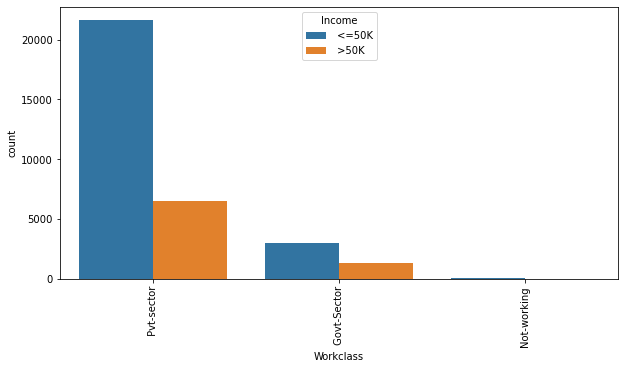

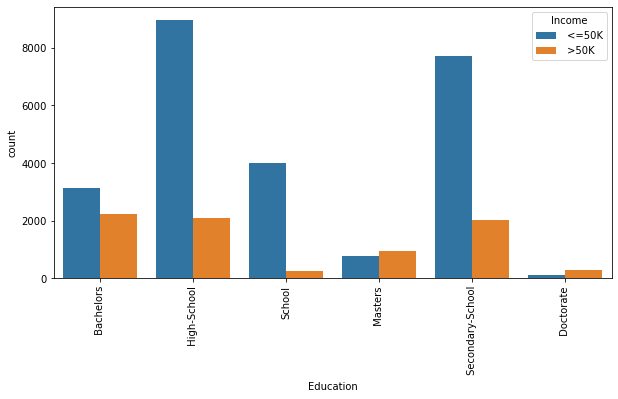

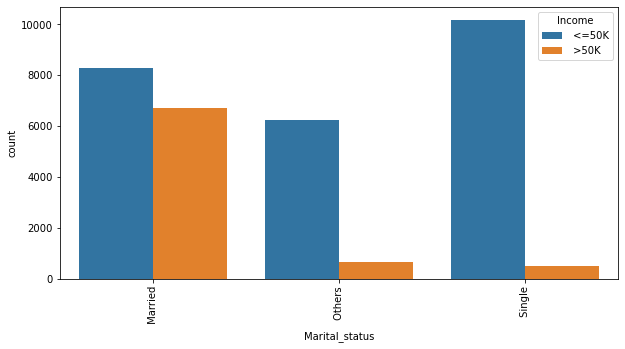

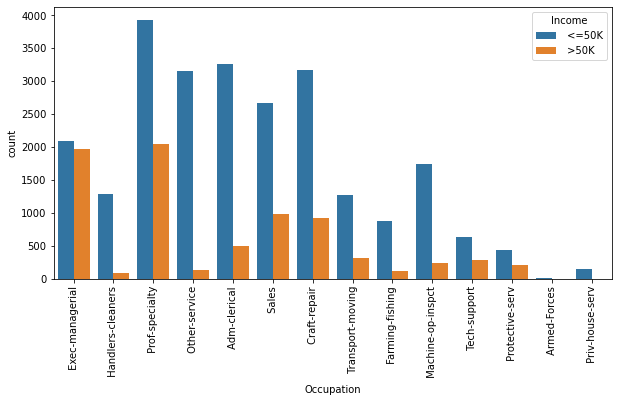

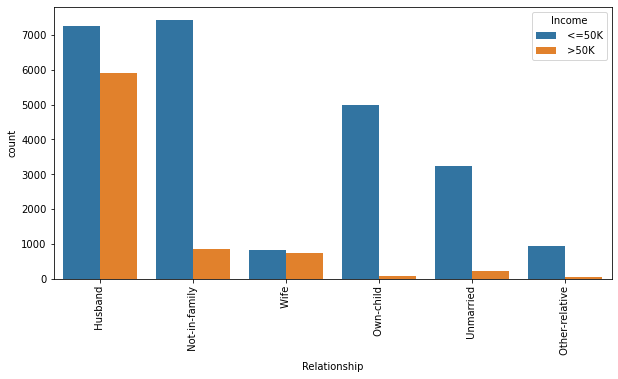

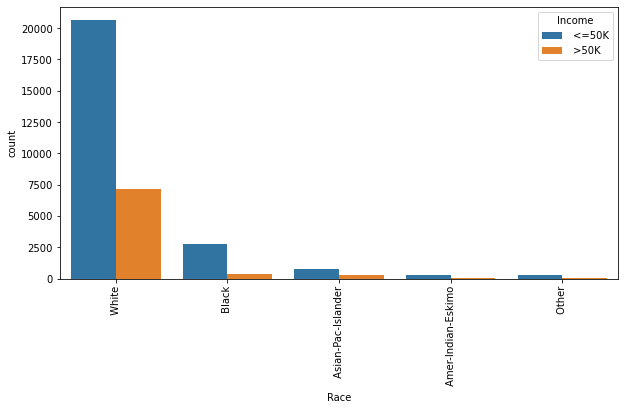

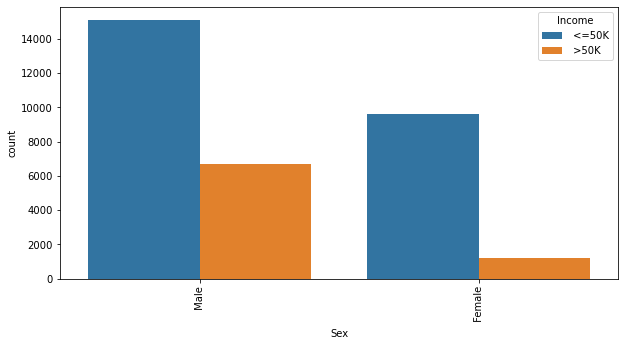

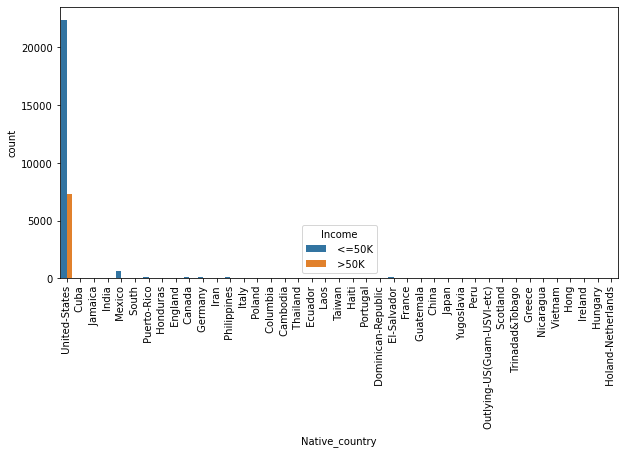

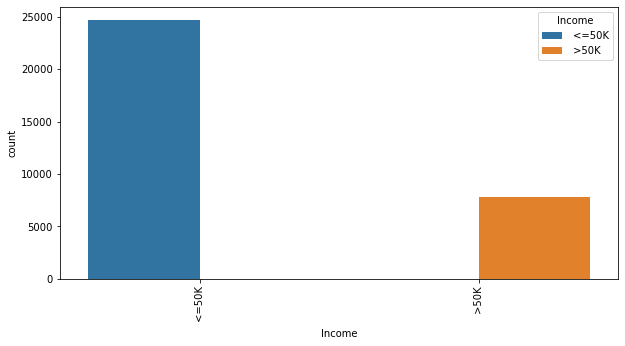

In [29]:
# Catagorical coloumn
for i in data[categorical_col]:
    plt.figure(figsize=(10,5))
    chart = sns.countplot(x=i,data=data,hue='Income')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Observation:
Gr-1:
The majority of the population works in the private sector and the majority has an income <= 50k
There is the smallest number of those who either worked and did not work without pay

Gr-2
Most of the population earning <=50k is high school graduate,School,or Secondary school
Most people earning> = 50k have Bachelors in some fieldsor Masters or Doctorates

Gr-3
Most people who are married earn> = 50k and who earn <= 50k are single or others

Gr-4
Most of the population earning> = 50,000 are Exec-managerial or professors
The vast majority of them who earn profit <= 50k are Admin-clerical,sales,Craft-repair and Transport depts
 
Gr-5 
Since most US people are of the Race white, their incomes are higher than those of race Black.

Gr-6
Majority of the Males are earning either <=50k or >=50k compared to females

Gr-7
According to the graph, the majority of the population around 90% are from the United States

Gr-8
On average, the majority of the population earns <= 50k

# Numerical Coloumns

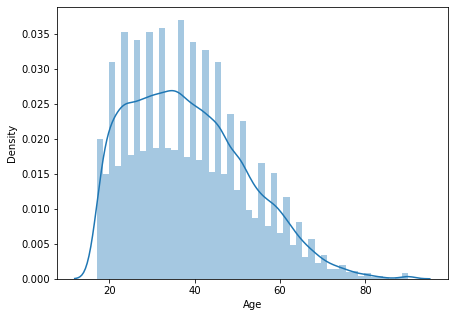

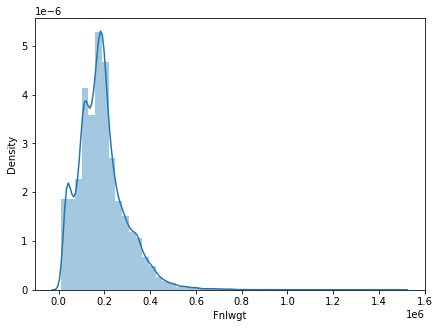

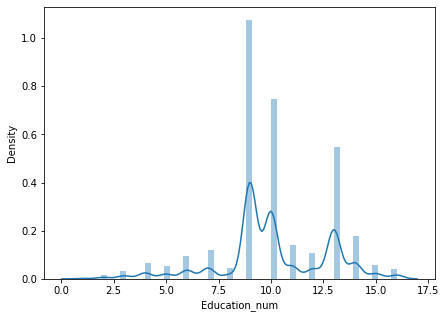

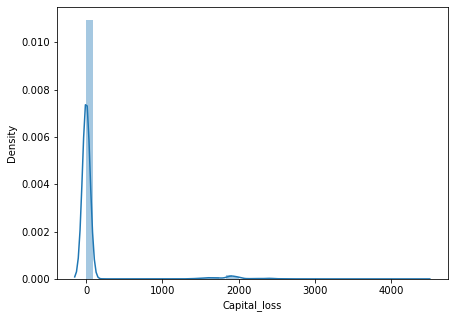

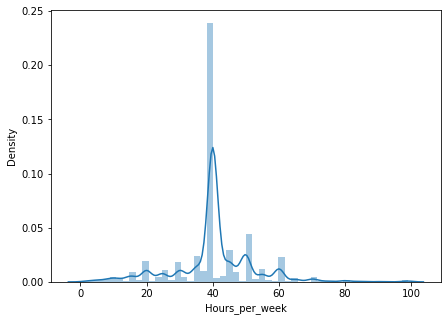

In [31]:
for i in numerical_col:
    plt.figure(figsize=(7,5))
    sns.distplot(data[i],hist=True,kde=True)
    plt.show()

Observations:
    :-The above plot shows Capital Loss,Fnlwgt are right skewed
    :-Education_num is letf skewed
    :-Age,Hours_per_week are normally distributed
    :-Most of the population works for about 40 hours per week.


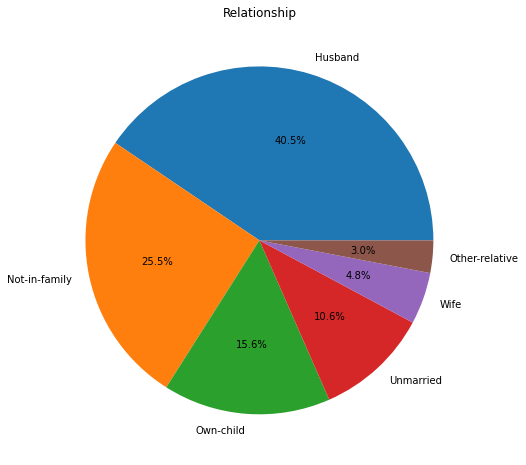

In [47]:
# Visualize the count of Relationship of the people
labels='Husband','Not-in-family','Own-child', 'Unmarried','Wife','Other-relative'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(data['Relationship'].value_counts(),autopct='%1.1f%%', labels=labels)
plt.title('Relationship')
plt.show()

The count is high in the Husband category which has around 40% of count and other relative has very least count around 3%.

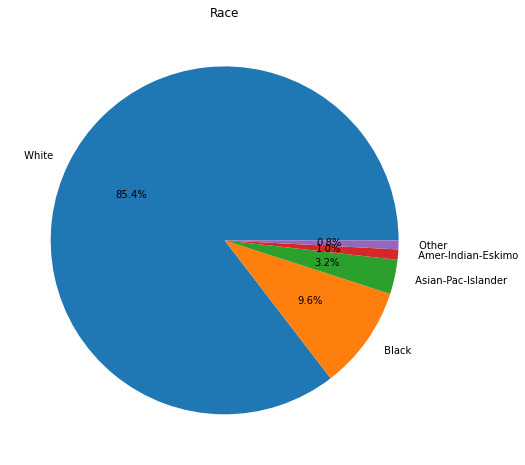

In [45]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title('Race')
ax.pie(data['Race'].value_counts(), labels=data['Race'].value_counts().index, autopct='%1.1f%%')
plt.show()

As we noticed from count plot majority of peoples  were white ie about 85.4% 9.6% of black , 

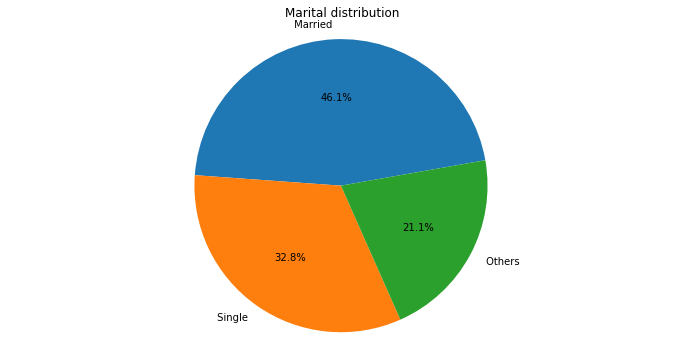

In [48]:
# Creating a pie chart for 'Marital status'
marital = data['Marital_status'].value_counts()
plt.figure(figsize=(12, 6))
plt.pie(marital.values, labels = marital.index, startangle=10, autopct='%1.1f%%')
plt.title('Marital distribution')
plt.axis('equal')
plt.show()

# Multivariate Analysis

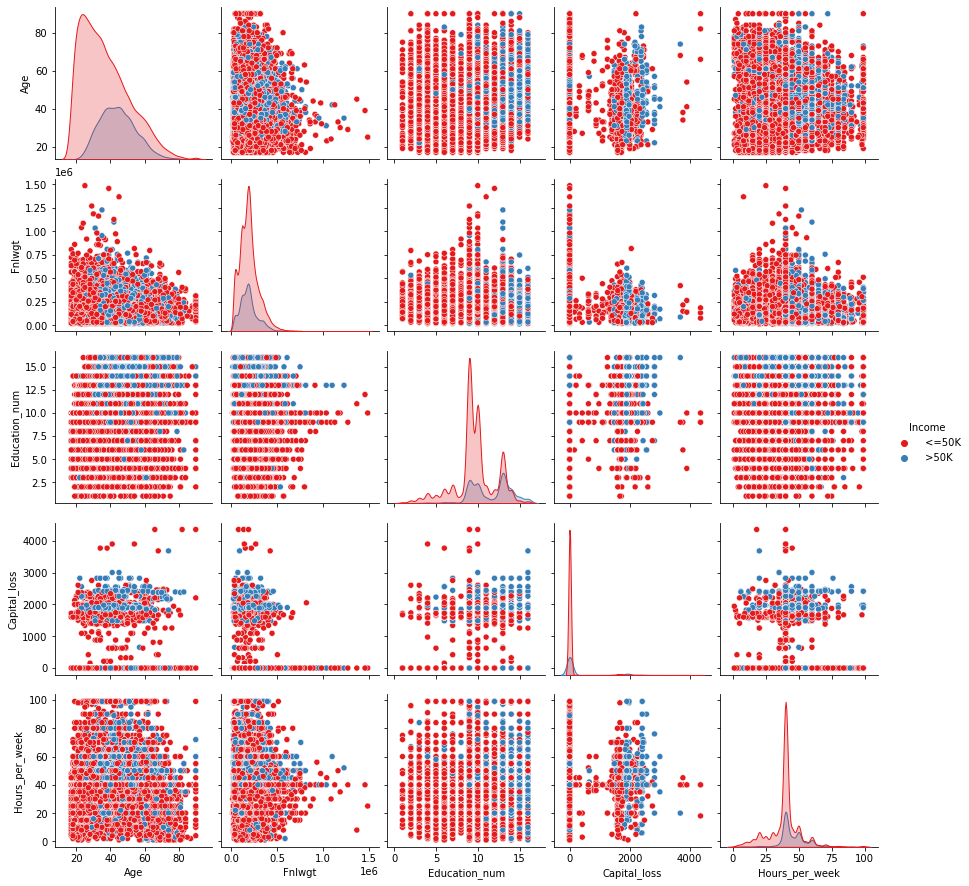

In [53]:
# plotting pairplot to check the relationship with multiple bivariate features
sns.pairplot(data,hue='Income',palette='Set1')
plt.show()

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Income". Here we can observe the relation between the features and label. Most of features are highly correlated with each other. Some of the features have outliers and skewness, will remove them later.

<Figure size 720x432 with 0 Axes>

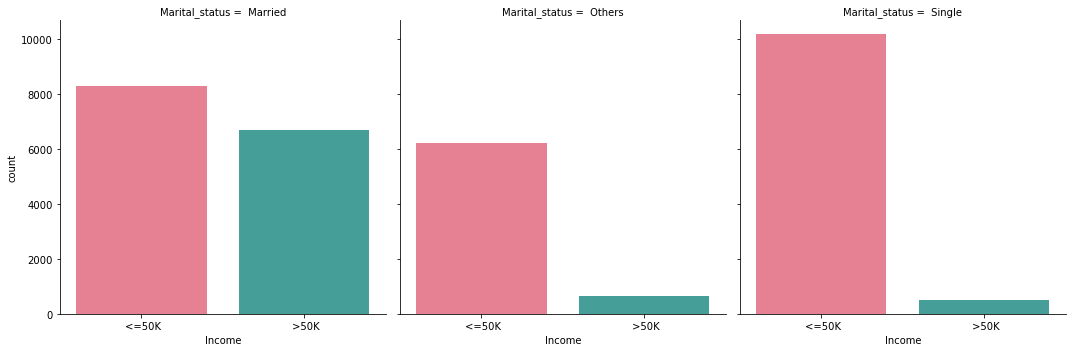

In [63]:
plt.figure(figsize=(10,6))
sns.catplot(x='Income',col='Marital_status',data=data,kind='count',palette="husl")
plt.show()

The people who are married they have the income >50K compare to others. The people who are staying singles earning <=50K income.

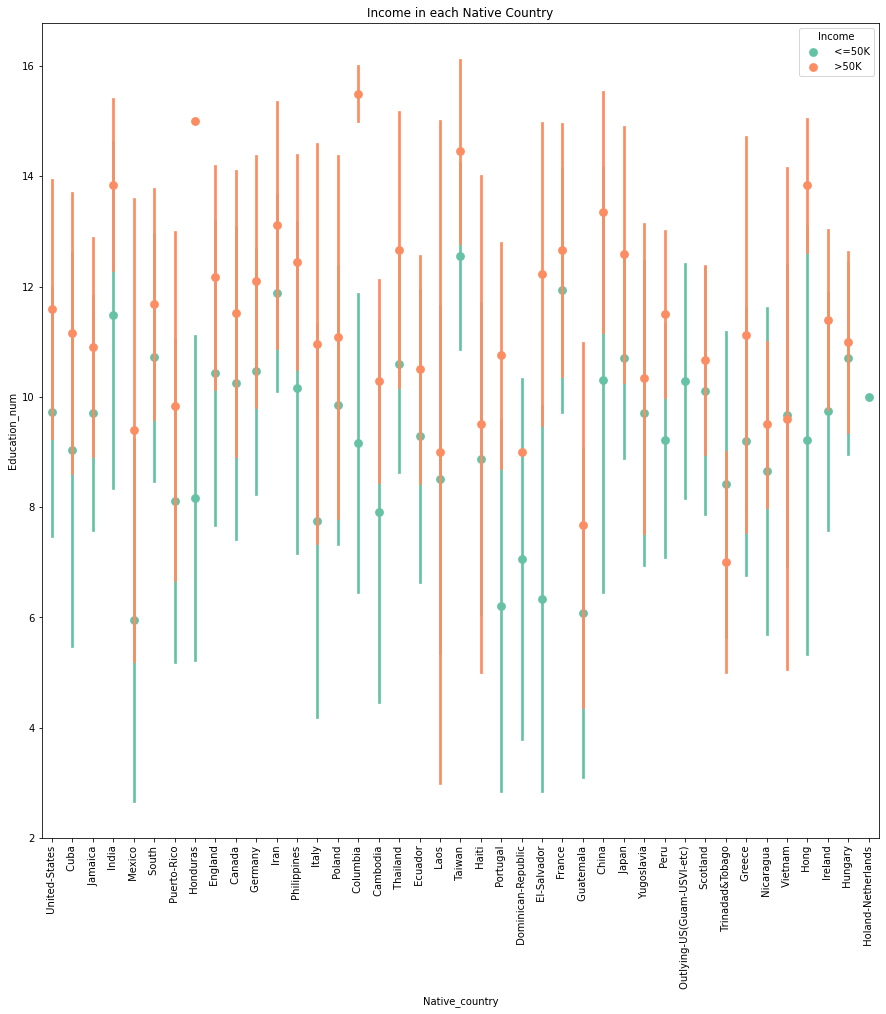

In [66]:
# Visualizing how the income changes for Native country of the people
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=data, hue='Income',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

The countries having high education numbers have high income that is more than 50K.
, Vietnam and Greece , Laos , Maxicomost peolple >50K

# Identifying the outliers

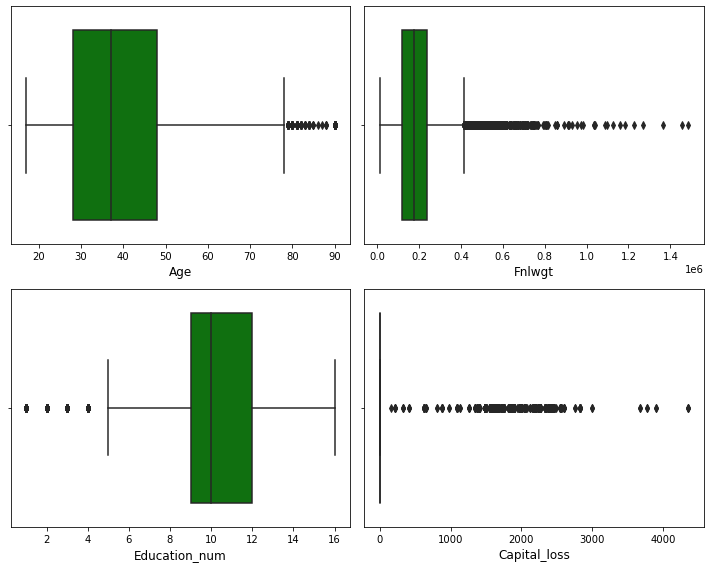

In [67]:
# Identifying the outliers using boxplot

plt.figure(figsize=(10,8),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column],color="g")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

The outliers present in all the columns we will remove it using Zscore method.

In [68]:
# Features containing outliers
features = data[["Age","Fnlwgt","Education_num","Hours_per_week"]]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,Age,Fnlwgt,Education_num,Hours_per_week
0,0.836961,1.008703,1.134817,2.222450
1,0.042934,0.245008,0.420646,0.035664
2,1.056935,0.425720,1.198377,0.035664
3,0.776180,1.408036,1.134817,0.035664
4,0.116259,0.898091,1.523683,0.035664
...,...,...,...,...
32555,0.849505,0.639647,0.745951,0.197648
32556,0.103715,0.335469,0.420646,0.035664
32557,1.423558,0.358812,0.420646,0.035664
32558,1.216128,0.110897,0.420646,1.655506


In [95]:
# Creating new dataframe
new_df = data[(z<3).all(axis=1)] 
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_loss,Hours_per_week,Native_country,Income
0,50,Pvt-sector,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K
1,38,Pvt-sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K
2,53,Pvt-sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K
3,28,Pvt-sector,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K
4,37,Pvt-sector,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Pvt-sector,257302,Secondary-School,12,Married,Tech-support,Wife,White,Female,0,38,United-States,<=50K
32556,40,Pvt-sector,154374,High-School,9,Married,Machine-op-inspct,Husband,White,Male,0,40,United-States,>50K
32557,58,Pvt-sector,151910,High-School,9,Others,Adm-clerical,Unmarried,White,Female,0,40,United-States,<=50K
32558,22,Pvt-sector,201490,High-School,9,Single,Adm-clerical,Own-child,White,Male,0,20,United-States,<=50K


In [71]:
# % of data loss
data.shape

(32536, 14)

In [74]:
(32536-31442)/32536*100

3.362429309073027

Only Very few data is lost

 # Checking the skewness

In [96]:
# Checking the skewness
new_df.skew()

Age               0.472290
Fnlwgt            0.635776
Education_num    -0.159303
Capital_loss      4.551825
Hours_per_week   -0.340717
dtype: float64

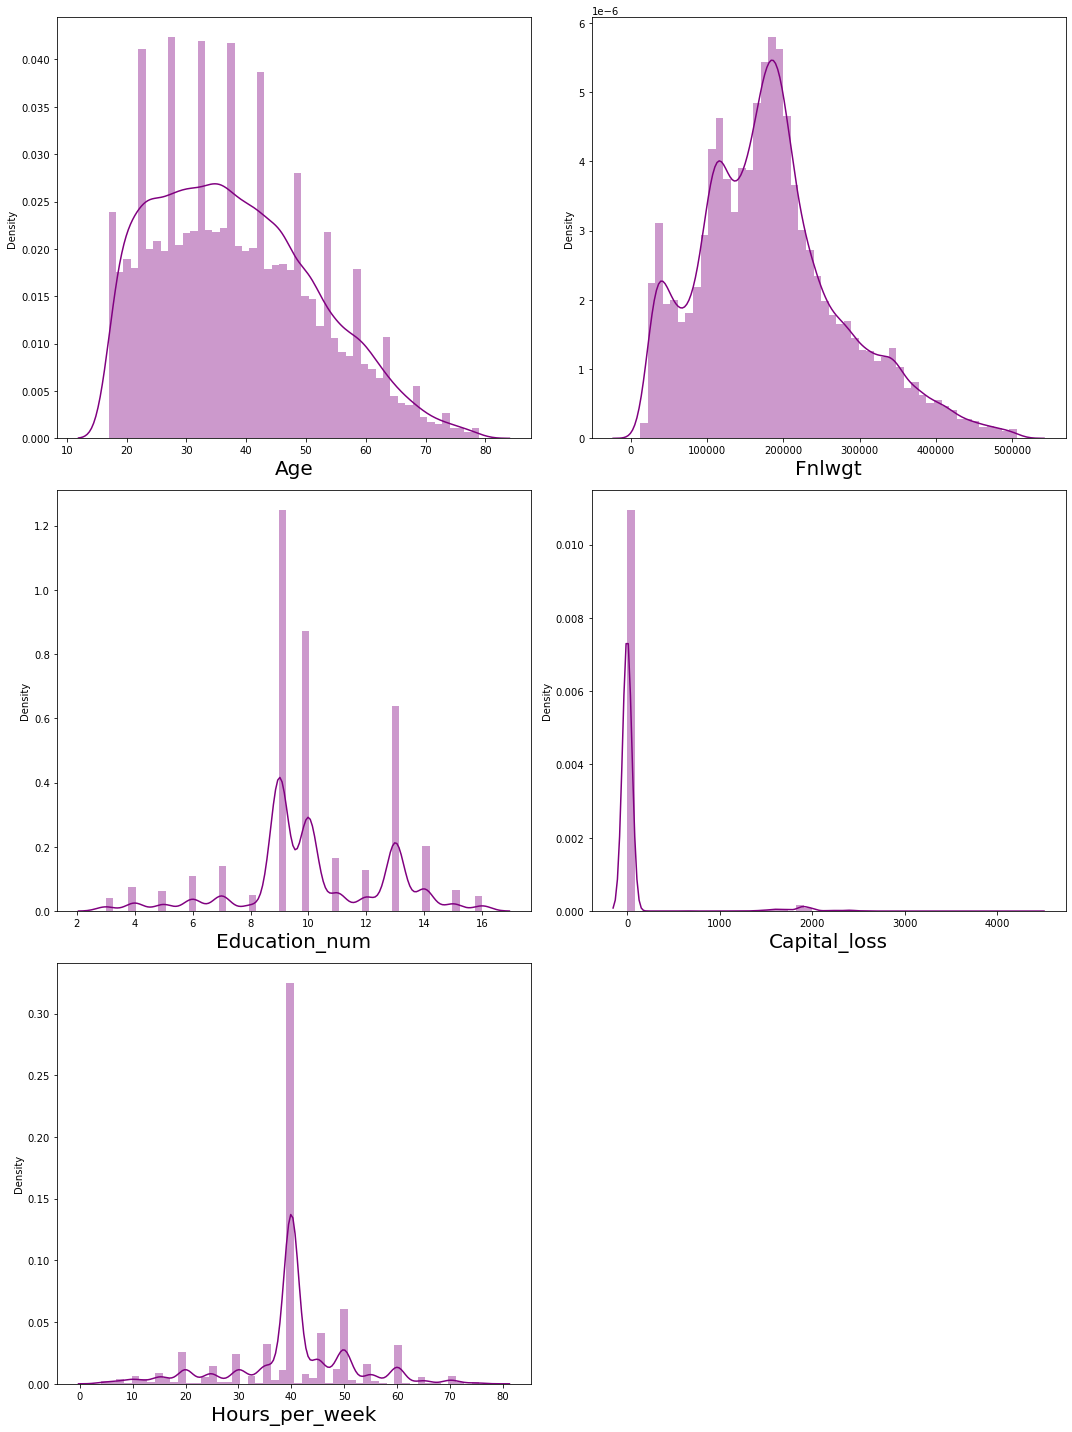

In [97]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(new_df[column],color="purple")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

As we noticed Capital_Loss and Fnlwgt have skewness above +-50 so we will use power transform to remove the skewness

In [98]:
from sklearn.preprocessing import PowerTransformer# importing
scaler = PowerTransformer(method='yeo-johnson')# initializing

In [99]:
feature = ['Capital_loss','Fnlwgt']
new_df[feature] = scaler.fit_transform(new_df[feature].values)

In [100]:
new_df.skew()

Age               0.472290
Fnlwgt           -0.034376
Education_num    -0.159303
Capital_loss      4.284061
Hours_per_week   -0.340717
dtype: float64

Again Capital Loss have high skewness so we will try one more time using log method

In [101]:
new_df['Capital_loss'] = np.log1p(new_df["Capital_loss"])

In [102]:
new_df.skew()

Age               0.472290
Fnlwgt           -0.034376
Education_num    -0.159303
Capital_loss      4.284061
Hours_per_week   -0.340717
dtype: float64

In [103]:
new_df['Capital_loss'] = scaler.fit_transform(new_df['Capital_loss'].values.reshape(-1,1))

In [104]:
new_df.skew()

Age               0.472290
Fnlwgt           -0.034376
Education_num    -0.159303
Capital_loss      4.284061
Hours_per_week   -0.340717
dtype: float64

In [105]:
new_df["Capital_loss"] = np.cbrt(new_df["Capital_loss"])

In [106]:
new_df.skew()

Age               0.472290
Fnlwgt           -0.034376
Education_num    -0.159303
Capital_loss      4.284061
Hours_per_week   -0.340717
dtype: float64

In [107]:
# So skewness of Capital_loss is unable to remove so we will drop the same from our axis
new_df=new_df.drop('Capital_loss',axis=1)

In [109]:
numerical_col=[]
for i in new_df.dtypes.index:
    if new_df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


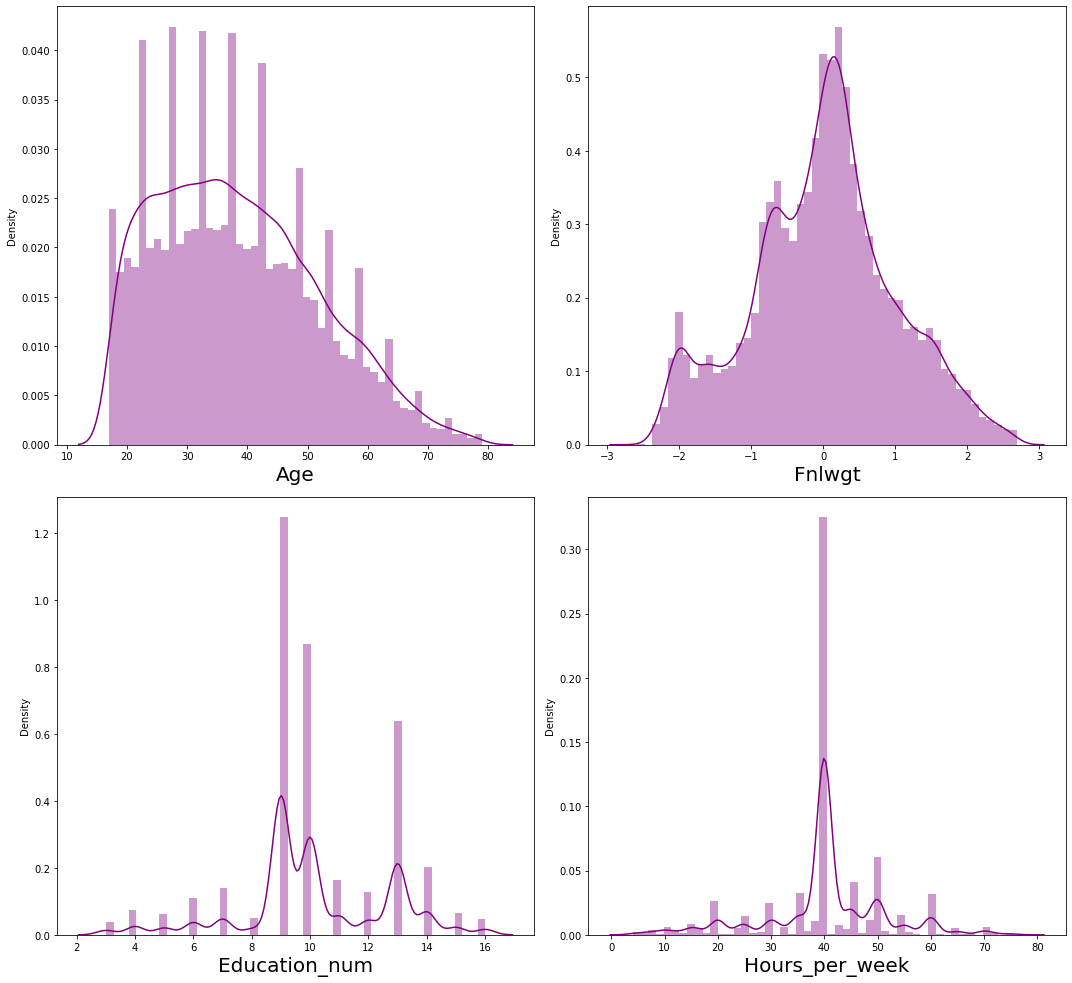

In [110]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(new_df[column],color="purple")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Encoding the categorical columns using Label Encoding

In [112]:
categorical_col = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,1,0,0,3,0,4,1,38,0
1,1,2,1,5,1,4,1,38,0
2,1,5,0,5,0,2,1,38,0
3,1,0,0,9,5,2,0,4,0
4,1,3,0,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,1,4,0,12,5,4,0,38,0
32556,1,2,0,6,0,4,1,38,1
32557,1,2,1,0,4,4,0,38,0
32558,1,2,2,0,3,4,1,38,0


# Correlation between the target variable and independent variables using HEAT map

In [113]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,-0.083536,-0.066464,-0.070959,0.053365,-0.475796,-0.001317,-0.268033,0.030646,0.091687,0.097148,-0.001043,0.248289
Workclass,-0.083536,1.000000,0.018830,0.063158,-0.161486,0.034160,0.005688,0.001060,0.051647,0.036162,-0.006252,-0.031671,-0.062902
Fnlwgt,-0.066464,0.018830,1.000000,0.015394,-0.033439,0.031920,0.001821,0.008320,-0.008317,0.025406,-0.015655,-0.061114,-0.004677
Education,-0.070959,0.063158,0.015394,1.000000,-0.574742,0.080564,-0.028138,0.100071,-0.020651,-0.044918,-0.146048,-0.032412,-0.198132
Education_num,0.053365,-0.161486,-0.033439,-0.574742,1.000000,-0.071555,0.073799,-0.102662,0.030889,0.016791,0.160668,0.054542,0.337717
Marital_status,-0.475796,0.034160,0.031920,0.080564,-0.071555,1.000000,0.000961,0.451147,-0.081674,-0.336218,-0.241632,0.009284,-0.425838
Occupation,-0.001317,0.005688,0.001821,-0.028138,0.073799,0.000961,1.000000,-0.037467,-0.004062,0.047946,-0.019927,-0.003725,0.034465
Relationship,-0.268033,0.001060,0.008320,0.100071,-0.102662,0.451147,-0.037467,1.000000,-0.115150,-0.583051,-0.263300,-0.010984,-0.251529
Race,0.030646,0.051647,-0.008317,-0.020651,0.030889,-0.081674,-0.004062,-0.115150,1.000000,0.088781,0.045393,0.122130,0.072467
Sex,0.091687,0.036162,0.025406,-0.044918,0.016791,-0.336218,0.047946,-0.583051,0.088781,1.000000,0.238892,0.002130,0.216677


<AxesSubplot:>

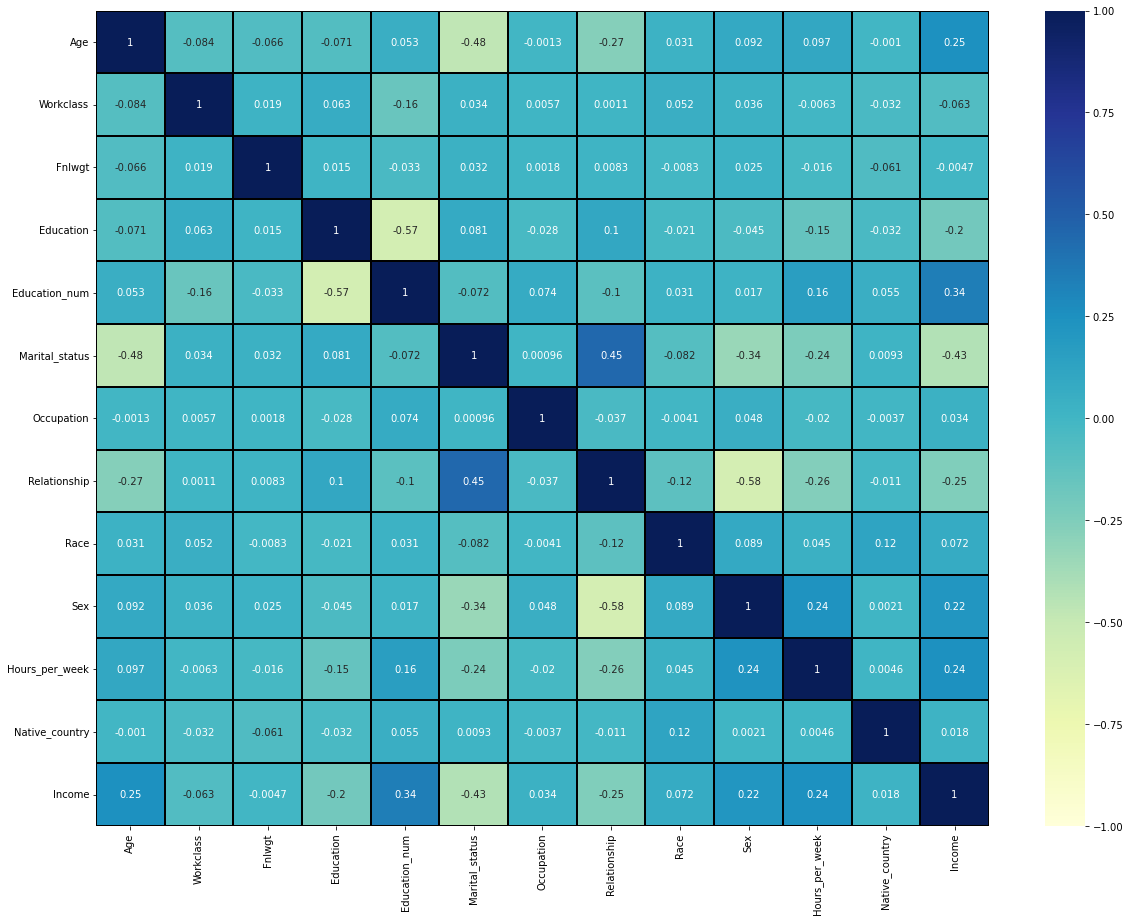

In [115]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other:

This heat map contains both positive and negative correlation.
There is no much correlation between the target and the label.
The columns Education_num, Age, Sex and Hours_per_week have positive correlation with the target.
The columns Marital status and Relationship have less correlation with the label.
The columns Relationship and Sex are highly correlated with each other also the column Fnlwgt has very less relation with    the label so we can drop these columns if necessary.
There is no multicollinearity issue exists in the data so no need to worry much.


In [116]:
cor['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.337717
Age               0.248289
Hours_per_week    0.242352
Sex               0.216677
Race              0.072467
Occupation        0.034465
Native_country    0.017665
Fnlwgt           -0.004677
Workclass        -0.062902
Education        -0.198132
Relationship     -0.251529
Marital_status   -0.425838
Name: Income, dtype: float64

# Visualizing the correlation between label and features using bar plot

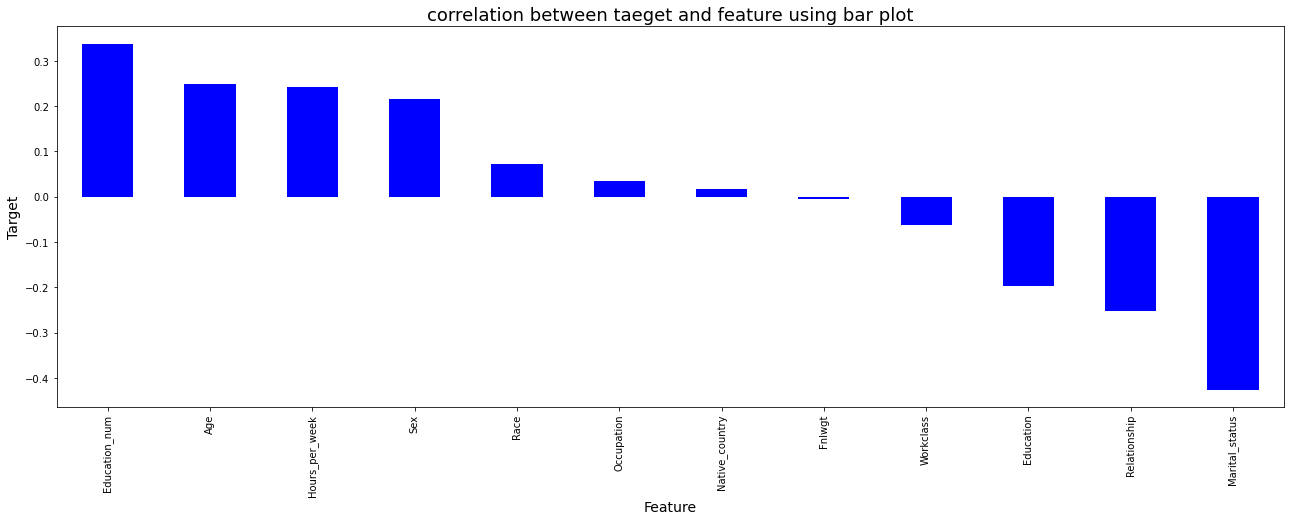

In [123]:
plt.figure(figsize=(22,7))
new_df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='blue')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between taeget and feature using bar plot',fontsize=18)
plt.show()

#From this we can easily identyfy that there is not much realtion between Fnlwgt and our Label So  we can drop it

In [124]:
new_df.drop('Fnlwgt',axis=1,inplace=True)

# Separating the features and label variables into x and y

In [126]:
x = new_df.drop("Income", axis=1)
y = new_df["Income"]

# Feature Scaling using Standard Scalarization

In [127]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.874757,0.39224,-1.669045,1.154199,-0.990171,-0.784467,-0.903169,0.391337,0.706618,-2.424850,0.254026
1,-0.025630,0.39224,-0.425620,-0.459834,0.147480,-0.282499,-0.282026,0.391337,0.706618,-0.008621,0.254026
2,1.099853,0.39224,1.439516,-1.266850,-0.990171,-0.282499,-0.903169,-1.969449,0.706618,-0.008621,0.254026
3,-0.775952,0.39224,-1.669045,1.154199,-0.990171,0.721438,2.202549,-1.969449,-1.415192,-0.008621,-5.456787
4,-0.100662,0.39224,0.196092,1.557707,-0.990171,-0.784467,2.202549,0.391337,-1.415192,-0.008621,0.254026
...,...,...,...,...,...,...,...,...,...,...,...
31437,-0.850984,0.39224,0.817804,0.750690,-0.990171,1.474391,2.202549,0.391337,-1.415192,-0.187601,0.254026
31438,0.124435,0.39224,-0.425620,-0.459834,-0.990171,-0.031515,-0.903169,0.391337,0.706618,-0.008621,0.254026
31439,1.475014,0.39224,-0.425620,-0.459834,0.147480,-1.537420,1.581405,0.391337,-1.415192,-0.008621,0.254026
31440,-1.226145,0.39224,-0.425620,-0.459834,1.285131,-1.537420,0.960262,0.391337,0.706618,-1.798420,0.254026


In [128]:
# Let us check our Label values
y.value_counts()

0    23836
1     7606
Name: Income, dtype: int64

So we need oversampling technique to make our data equaly distributed

In [130]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [131]:
#again check the value of y
y.value_counts()

0    23836
1    23836
Name: Income, dtype: int64

In [134]:
x

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.874757,0.392240,-1.669045,1.154199,-0.990171,-0.784467,-0.903169,0.391337,0.706618,-2.424850,0.254026
1,-0.025630,0.392240,-0.425620,-0.459834,0.147480,-0.282499,-0.282026,0.391337,0.706618,-0.008621,0.254026
2,1.099853,0.392240,1.439516,-1.266850,-0.990171,-0.282499,-0.903169,-1.969449,0.706618,-0.008621,0.254026
3,-0.775952,0.392240,-1.669045,1.154199,-0.990171,0.721438,2.202549,-1.969449,-1.415192,-0.008621,-5.456787
4,-0.100662,0.392240,0.196092,1.557707,-0.990171,-0.784467,2.202549,0.391337,-1.415192,-0.008621,0.254026
...,...,...,...,...,...,...,...,...,...,...,...
47667,1.115034,-2.520564,0.196092,1.557707,0.377650,0.721438,-0.282026,0.391337,-1.415192,-0.510388,0.254026
47668,-0.237288,-2.520564,-1.669045,1.154199,-0.990171,0.721438,2.202549,0.391337,-1.415192,-0.188937,0.254026
47669,0.607818,-2.520564,0.196092,1.557707,-0.990171,0.721438,-0.903169,0.391337,0.706618,-0.406166,0.254026
47670,-0.100662,0.392240,0.817804,-0.056326,-0.892007,-1.472450,-0.849573,-2.071301,0.523535,-0.008621,-2.418923


# Modeling

In [132]:
#Finding best random state
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8389735701300517  on Random_state  168


The best accuracy is 83.9% at the random state 168

In [133]:
# Split the data at best Random State
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =maxRS)


# Classification Algorithms

In [138]:
from sklearn import datasets

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier

# Decision Tree Classifier

In [139]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))



0.8393930918752622
[[6059 1100]
 [1197 5946]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      7159
           1       0.84      0.83      0.84      7143

    accuracy                           0.84     14302
   macro avg       0.84      0.84      0.84     14302
weighted avg       0.84      0.84      0.84     14302



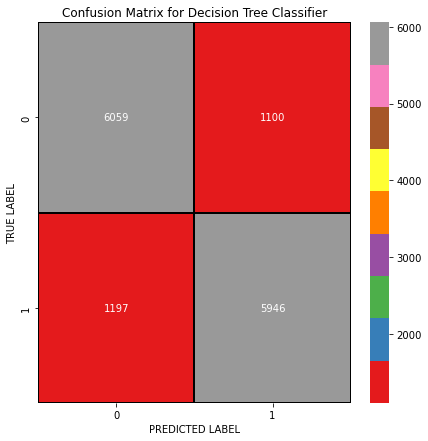

In [140]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Set1",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Random Forest Classifier

In [141]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8675709690952315
[[6157 1002]
 [ 892 6251]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      7159
           1       0.86      0.88      0.87      7143

    accuracy                           0.87     14302
   macro avg       0.87      0.87      0.87     14302
weighted avg       0.87      0.87      0.87     14302



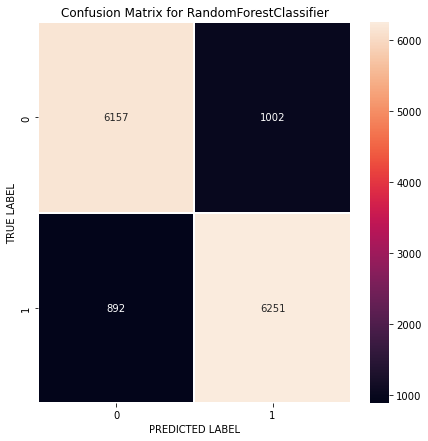

In [144]:
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2,fmt = ".0f" )

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Logistic Regression

In [145]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7970913158998741
[[5363 1796]
 [1106 6037]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      7159
           1       0.77      0.85      0.81      7143

    accuracy                           0.80     14302
   macro avg       0.80      0.80      0.80     14302
weighted avg       0.80      0.80      0.80     14302



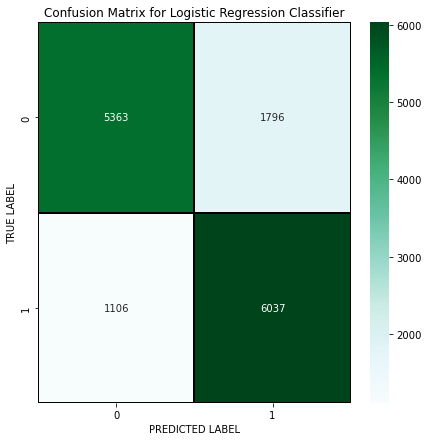

In [147]:
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", cmap="BuGn")

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# KNeighbors Classifier

In [148]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8349881135505524
[[5528 1631]
 [ 729 6414]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      7159
           1       0.80      0.90      0.84      7143

    accuracy                           0.83     14302
   macro avg       0.84      0.84      0.83     14302
weighted avg       0.84      0.83      0.83     14302



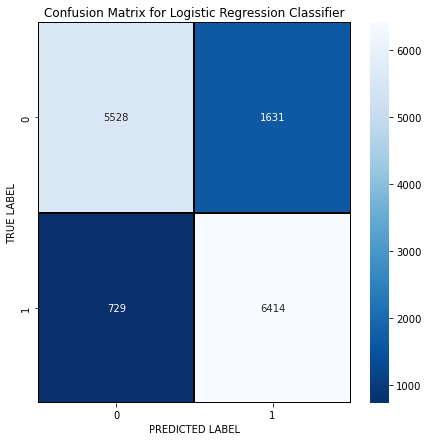

In [154]:
#Let us plot
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", cmap="Blues_r")

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# Gradient Boosting Classifier

In [153]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8463851209621032
[[5701 1458]
 [ 739 6404]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      7159
           1       0.81      0.90      0.85      7143

    accuracy                           0.85     14302
   macro avg       0.85      0.85      0.85     14302
weighted avg       0.85      0.85      0.85     14302



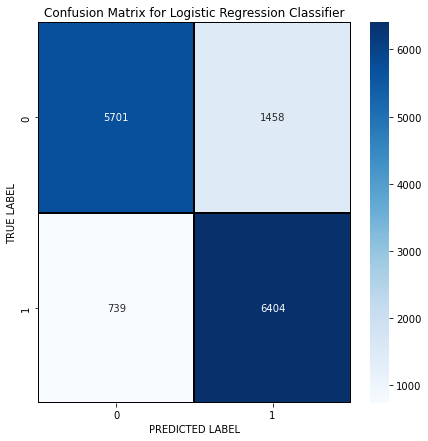

In [157]:
#Let us plot
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", cmap="Blues")

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# ROC & AUC Curve

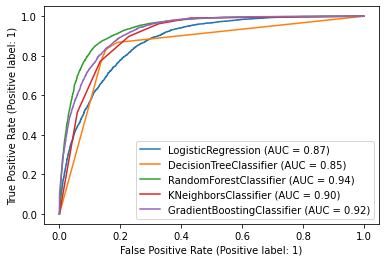

In [163]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(DTC, x_test, y_test, ax = disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax = disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax = disp.ax_)

plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()

RandomForestClassifier and GradientBoosting Classifier offer good performance compared to other algorithms. Let's find cross validation score of our models and find the best one

# Checking the Cross Validation Score

In [158]:
from sklearn.model_selection import cross_val_score
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8306369003205374


In [159]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8666953422239881


In [160]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.7936105186537976


In [161]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.8326487390531984


In [162]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.8417530106970125


From the difference between the accuracy score and the CV score we can conclude that Random Forest Classifier as our best fitting model.




# Hyperparmeter Turing

In [164]:
#lets selects different parameters for tuning
grid_params = {
                'criterion':['gini','entropy'],
                'max_depth': [15,20,22],
                'n_estimators':[700,900,1000],
                'min_samples_leaf': [1]
                }

In [165]:
GCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 22], 'min_samples_leaf': [1],
                         'n_estimators': [700, 900, 1000]})

In [166]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 22,
 'min_samples_leaf': 1,
 'n_estimators': 1000}

In [167]:
#Let's train and test our model using best parameters
Random_model = RandomForestClassifier( criterion = 'entropy', max_depth=22, n_estimators=1000, min_samples_leaf = 1)

In [170]:
Random_model.fit(x_train,y_train)
pred = Random_model.predict(x_test)

In [172]:
print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("---------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,pred)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("---------------------------------------------------")

print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
print("---------------------------------------------------")

Accuracy Score: 87.28149909103622%
---------------------------------------------------
roc_auc_score: 87.28541772229228%
---------------------------------------------------
Confusion Matrix : 
 [[5998 1161]
 [ 658 6485]]

---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      7159
           1       0.85      0.91      0.88      7143

    accuracy                           0.87     14302
   macro avg       0.87      0.87      0.87     14302
weighted avg       0.87      0.87      0.87     14302

---------------------------------------------------


Accuracy of our model is 87%

# ROC curve for final model

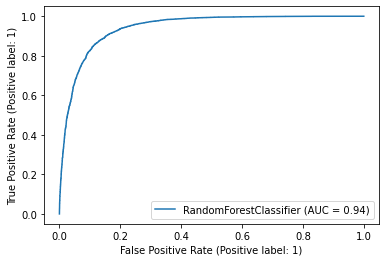

In [173]:
#Lets check our model performance after hyperparameter tuning by plottin 
plot_roc_curve(Random_model, x_test, y_test)
plt.show()

Great, we've improved the model's accuracy score as well as performance (AUC) by adjusting hyperparameters.

# Save the model

In [174]:
import joblib
joblib.dump(Random_model,"Census_Income_prediction.pkl")

['Census_Income_prediction.pkl']

# Load the model

In [175]:
Model = joblib.load("Census_Income_prediction.pkl")
a = np.array(y_test)
prediction = Model.predict(x_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,0,1
...,...,...
14297,0,0
14298,0,0
14299,1,1
14300,1,1


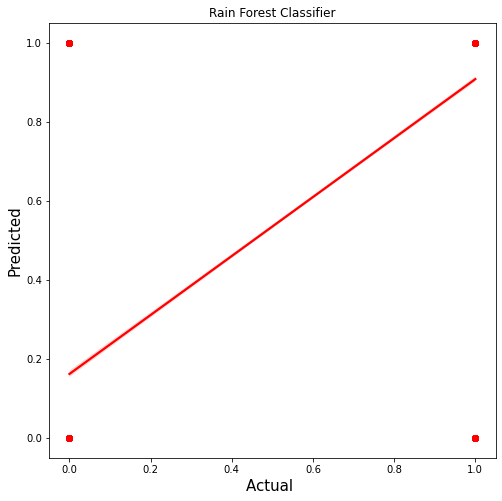

In [177]:
#let us plot the result
plt.figure(figsize=(8,8))
sns.regplot(y_test,prediction,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Rain Forest Classifier")
plt.show()

# Concluding Remarks

The objective of the project was to predict whether a person makes over 50K a year given their demographic variations. To achieve this, several classification techniques are explored. In the end, random forest model yields to the best prediction result.